<a href="https://colab.research.google.com/github/allansuzuki/Credit_Card_Fraud/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD FRAUD

It's been quite normal have a credit card transaction blocked nowadays.
According to [PRELEC AND SIMESTER [2000]](https://web.mit.edu/simester/Public/Papers/Alwaysleavehome.pdf), study shows that consumers spend more when they pay with credit cards rather than cash. The ease of the credit cards make us not suffer from cash leaving your wallet. It might also explain the rising rate of credit card indebtedness in the U.S.

According to annual report from the industry research firm [Nilson Report](https://nilsonreport.com/upload/content_promo/NilsonReport_Issue1209.pdf), actual losses experienced by issuers, merchants and acquirers exceed the $28.58 billion lost globally last year and can’t be accurately calculated, the report noted, because there are additional expenses related to fraud investigation, managing call centers and maintaining operations, which tend to rise annually.

Therefore, it's clear the importance in prevent credit card frauds, without mentioning the bad user experience by the financial institutions.
In this project, it will be developed a machine learning model to detect fraud using historical data.

## DATABASE

The [credit card fraud database](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. It contains only numerical input variables which are the result of a **PCA transformation**. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.



### Fields:
* `Time`: *Number of seconds elapsed between this transaction and the first transaction in the dataset*
* `V1,V2,V3,...,V28`: *PCA components (data transformation from the original data)* 
* `Amount`: *Transaction amount*
* `Class`: Classify as fraud (1) or not (0)



**Load Database**

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

title = "#505050"
gray = "#9E9E9E"

#font dict
##H1
h1 = {'fontsize':18,
      'fontweight':'bold',
      'color':title}


plt.rcParams['text.color']=gray
plt.rcParams['axes.labelcolor']=gray
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
plt.rcParams['xtick.color']=gray
plt.rcParams['ytick.color']=gray
plt.rcParams["figure.autolayout"] = True

raw = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

# Exploratory Data Analyst (EDA)

* Head and tail from database

In [3]:
raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


* Column types:

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Only one categorical column and, decimal, the others.
There are no missing values.

* Data distribution:

In [5]:
raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Distribution of transaction amount:

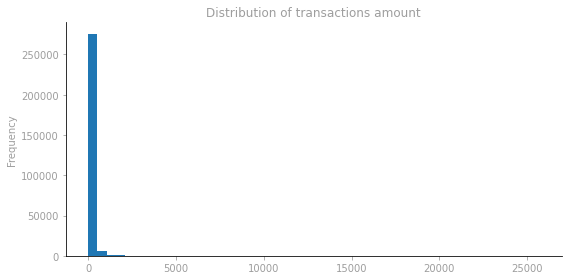

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,4));
raw['Amount'].plot(kind='hist',bins=50,ax=ax);
ax.set_title('Distribution of transactions amount');


* Data labels in graphs

In [7]:
"""Function to format numbers into k and M"""
def formatnum(num,ndecimal:int=0):
    #count total non-decimal numbers
    numbers = len(f"{num:.0f}")

    #count how many thousands is possible to divide
    nk = (numbers-3)//3

    #define format number
    if nk==0: fmt=''
    elif nk==1: fmt=' k'
    elif nk==2: fmt=' M'
    elif nk==3: fmt=' B'
    elif nk==4: fmt=' T'

    if numbers>3: numfmt = num/nk/1000
    else: 
      numfmt=num
      ndecimal=0

    return f"{numfmt:.{ndecimal}f}{fmt}"

"""Function to generate data labels in bar"""
def setAnnot(plots, textsize, fmt):
  dpi = plt.gcf().dpi
  sum=0
  for bar in plot.patches:
    sum+=bar.get_height()
  for bar in plots.patches:
    #Default: plot data inside the bars
    if bar.get_height()/dpi > 1.5*textsize: 
      xyOffset = (0,-5)
      txtcolor = 'white'
    else: 
      xyOffset = (0,textsize*2+5)
      txtcolor = gray
    anot = plot.annotate(
      s=f"{formatnum(bar.get_height(),ndecimal=1)}\n({bar.get_height()/sum:.1%})",
      xy=(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
      ha='center', va='top',
                size=textsize, color=txtcolor, fontweight='bold', xytext=xyOffset,
                textcoords='offset points');
    
    #verify if explode the text:
    # (x1,y1),(x2,y2) = anot.get_window_extent().get_points()
    # (x3,y3),(x4,y4) = bar.get_bbox().get_points()
    # if ((x2-x1)>=(x4-x3)): anot.set(y=bar.get_height()+textsize*2+5,color=gray)

"""Function to apply graph style """
def applygraph(ax,txtsize:int=10,txtfmt:str='.0f'):
  #SPINES
  # ax.spines['top'].set_visible(False)
  # ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color(gray)

  #TICKS
  ax.set_yticklabels([])
  ax.tick_params('both',left=False,bottom=False)
  # ax.set_xticklabels(color=gray)
  
  #LABELS
  ax.set_ylabel('')
  # ax.set_xlabel(color=gray)

  setAnnot(ax,txtsize,txtfmt)

* Distribution of fraud occurences

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


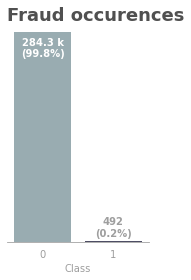

In [8]:
fig = plt.figure(figsize=(2.7,4))
plot = sns.countplot(raw['Class'],palette='bone_r');

applygraph(plot,txtsize=10)
# la = plot.text(-.5, 300000, 'Fraud occurences', fontsize=18, fontweight='bold',color=title);
la = plot.text(-.5, 300000, 'Fraud occurences', fontdict=h1);


It's perceptive the unbalacement of the data. This is **extremely important** because our model is interest in detect the fraud occurences. If the data gives more samples of normal transactions, it would not be effect to detect fraud transactions.

* Time and Amount per occurences type:

Text(0.65, 250000, 'in the time')

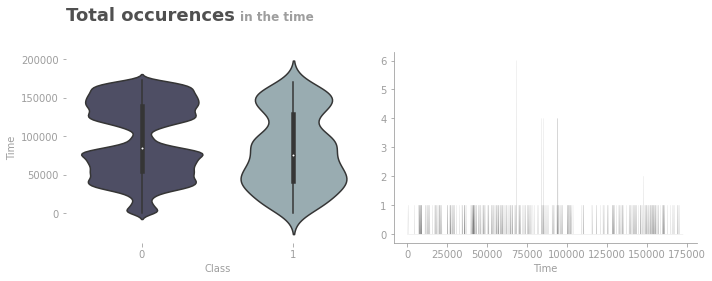

In [9]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.violinplot(y=raw['Time'], x=raw['Class'],ax=ax[0],palette='bone')
raw.groupby('Time')['Class'].sum().plot(ax=ax[1],alpha=.5,lw=.1,cmap='bone');

ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
for axx in ax:
  axx.spines['left'].set_color(gray)
  axx.spines['bottom'].set_color(gray)
ax[0].text(-.5,250000,'Total occurences',fontdict=h1)
ax[0].text(.65,250000,'in the time',fontsize=12,fontweight='bold')
# ax.tick_params('both',bottom=False)

# raw[['Time','Class']].set_index('Time')
# la.get_window_extent()
# (x1,y1),(x2,y2) = plot.patches[0].get_window_extent().get_points()
# x2-x1

Another feature that is clearly relevant is the `Time`, since there is certain period of the time the fraud occured. Although the time of the day is extremely relevant (*e.g. could occur more attacks after midnight and even more in holidays*), since we only have the seconds lapsed, we will not input it in our model.

Text(0.48, 29000, 'by amount transactioned')

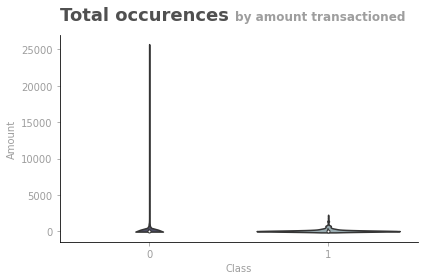

In [47]:
fig,ax = plt.subplots(1,1)
# ax1 = plt.subplot(241)
# ax2 = plt.subplot(242)
# ax3 = plt.subplot(245)
# ax4 = plt.subplot(246)
# ax5 = plt.subplot(2,4,(3,8))
# # fig,ax = plt.subplot('A,B,C,C;D,E,C,C')
# # fig,ax = plt.subplots(2,4)
# raw['Time'].loc[raw['Class']==0].plot(kind='hist',ax=ax1);
# raw['Time'].loc[raw['Class']==1].plot(kind='hist',ax=ax2);
# raw['Amount'].loc[raw['Class']==0].plot(kind='hist',ax=ax3);
# raw['Amount'].loc[raw['Class']==1].plot(kind='hist',ax=ax4);
# # ax['A'].set_title('Non Fraud');
# # ax['B'].set_title('Fraud');

sns.violinplot(data=raw,y='Amount',x='Class',ax=ax,palette='bone');
ax.text(-.5,29000,'Total occurences',fontdict=h1)
ax.text(.48,29000,'by amount transactioned',fontsize=12,fontweight='bold')

# plt.tight_layout()

This super-thin and other super-flat distributions means that:
* There are big values transactioned that are non frauds;
* The frauds are not related to big figures, may say, more than 5k;
* The majority of the value transactioned are not big figures, even for frauds.

Which happens to be that these columns `Time` and `Amount`, they their own, don't explain a rule to detect fraud transactions.

Let's move to analyse the V-columns:

# Modeling 


In [ ]:
# ERROR!
# Define a supervised method for classification
# Define the data, and split
# train it and measure

#Than, balance

# Conclusion